Lab04: Compare the performanc of SDG and the Batch method using delta learning rule.

[[1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]]
2
Final MSE (Batch Delta Rule): 0.062500
Final MSE (Stochastic Delta Rule - SDG): 0.077160


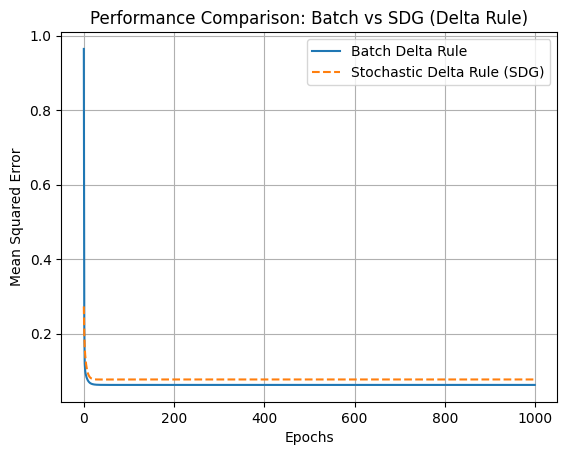

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset for AND gate
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# Target output for AND gate
T = np.array([[0], [0], [0], [1]])

# Add bias to input
X_b = np.hstack((np.ones((X.shape[0], 1)), X))  # shape (4, 3)
print(X_b)

# Activation function: Identity (for delta rule)
def activation(x):
    return x

# Batch Delta Rule
def delta_rule_batch(X, T, epochs=100, lr=0.1):
    W = np.random.rand(X.shape[1], 1)
    error_list = []

    for epoch in range(epochs):
        O = activation(X @ W)
        error = T - O
        W += lr * X.T @ error  # batch update
        mse = np.mean(error**2)
        error_list.append(mse)

    return W, error_list

# Stochastic Delta Rule (SDG)
def delta_rule_sdg(X, T, epochs=100, lr=0.1):
    W = np.random.rand(X.shape[1], 1)
    error_list = []

    for epoch in range(epochs):
        mse_epoch = 0
        for i in range(X.shape[0]):
            xi = X[i].reshape(1, -1)  # row vector
            ti = T[i]
            oi = activation(xi @ W)
            ei = ti - oi
            W += lr * xi.T @ ei
            mse_epoch += ei**2
        error_list.append((mse_epoch / X.shape[0]).item())  # scalar value

    return W, error_list
print(X.shape[1])
# Training parameters
epochs = 1000
learning_rate = 0.1

# Train with Batch method
W_batch, error_batch = delta_rule_batch(X_b, T, epochs, learning_rate)

# Train with Stochastic method
W_sdg, error_sdg = delta_rule_sdg(X_b, T, epochs, learning_rate)

# Print final MSE errors
print(f"Final MSE (Batch Delta Rule): {error_batch[-1]:.6f}")
print(f"Final MSE (Stochastic Delta Rule - SDG): {error_sdg[-1]:.6f}")

# Plot error over epochs
plt.plot(error_batch, label='Batch Delta Rule')
plt.plot(error_sdg, label='Stochastic Delta Rule (SDG)', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Performance Comparison: Batch vs SDG (Delta Rule)')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# Additional test inputs (including original AND inputs + some new ones)
X_test_extra = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
    [0.5, 0.5],  # new input (in-between)
    [0.2, 0.8],  # new input
    [0.9, 0.9]   # new input
])

# Add bias term to these inputs
X_test_extra_b = np.hstack((np.ones((X_test_extra.shape[0], 1)), X_test_extra))

# Test function (same as before)
def test_model(X, W):
    O = activation(X @ W)
    predictions = (O >= 0.5).astype(int)
    return predictions

# Test Batch model on new inputs
print("Testing Batch Delta Rule Model on extended inputs:")
pred_batch_extra = test_model(X_test_extra_b, W_batch)
for inp, pred in zip(X_test_extra, pred_batch_extra):
    print(f"Input: {inp} -> Predicted Output: {pred[0]}")

print("\nTesting Stochastic Delta Rule (SDG) Model on extended inputs:")
pred_sdg_extra = test_model(X_test_extra_b, W_sdg)
for inp, pred in zip(X_test_extra, pred_sdg_extra):
    print(f"Input: {inp} -> Predicted Output: {pred[0]}")


Testing Batch Delta Rule Model on extended inputs:
Input: [0. 0.] -> Predicted Output: 0
Input: [0. 1.] -> Predicted Output: 0
Input: [1. 0.] -> Predicted Output: 0
Input: [1. 1.] -> Predicted Output: 1
Input: [0.5 0.5] -> Predicted Output: 0
Input: [0.2 0.8] -> Predicted Output: 0
Input: [0.9 0.9] -> Predicted Output: 1

Testing Stochastic Delta Rule (SDG) Model on extended inputs:
Input: [0. 0.] -> Predicted Output: 0
Input: [0. 1.] -> Predicted Output: 0
Input: [1. 0.] -> Predicted Output: 0
Input: [1. 1.] -> Predicted Output: 1
Input: [0.5 0.5] -> Predicted Output: 0
Input: [0.2 0.8] -> Predicted Output: 0
Input: [0.9 0.9] -> Predicted Output: 1


Lab08: write a MATLAB or python program to recognize the numbers 1-4 from space signal using artificial neural network(ANN)

In [ ]:
import os
import librosa
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Function to extract MFCC features from an audio file
def extract_features(file_path):
    audio, sample_rate = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled = np.mean(mfccs.T, axis=0)
    return mfccs_scaled

# Load data and labels
data = []
labels = []

# Specify the folder containing your audio files
folder = '/content/drive/MyDrive/speech'  # Replace with your actual Google Drive path

# Loop through all .mp3 files in the folder
for file in os.listdir(folder):
    if file.endswith('.mp3'):
        file_path = os.path.join(folder, file)
        features = extract_features(file_path)
        data.append(features)

        # Extract label from filename (e.g., from '1_01.mp3' get 1)
        label = int(file.split('_')[0])
        labels.append(label - 1)  # Adjust to start labels from 0

# Convert to NumPy arrays
data = np.array(data)
labels = to_categorical(np.array(labels), num_classes=4)  # Change num_classes as needed

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Build the Artificial Neural Network (ANN) model
model = Sequential()
model.add(Dense(256, input_shape=(40,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))  # Use 4 neurons for 4 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

# Save the trained model
model.save('speech_number_recognition_model.h5')

print("Model training complete and saved!")


<ipython-input-19-0ee47602a302>:11: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-19-0ee47602a302>:11: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-19-0ee47602a302>:11: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_path, sr=None)
/usr/loca

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step - accuracy: 0.3889 - loss: 47.3946 - val_accuracy: 0.2500 - val_loss: 11.3685
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.1944 - loss: 51.3314 - val_accuracy: 0.2500 - val_loss: 11.8480
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.0556 - loss: 52.3116 - val_accuracy: 0.2500 - val_loss: 18.2226
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.3889 - loss: 23.0274 - val_accuracy: 0.2500 - val_loss: 33.8243
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.2083 - loss: 42.5545 - val_accuracy: 0.2500 - val_loss: 40.3498
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.2083 - loss: 39.9038 - val_accuracy: 0.2500 - val_loss: 39.4776
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5139 - loss: 26.0414 - val_accuracy: 0.2500 - val_loss: 35.8532
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.1944 - loss: 23.1092 - val_accuracy: 0.2500 - val_l

Model training complete and saved!


In [30]:
from tensorflow.keras.models import load_model
import numpy as np
import librosa

# 1. Load the trained model
model = load_model('speech_number_recognition_model.h5')

# 2. Function to extract features from audio file (same as training)
def extract_features(file_path):
    audio, sample_rate = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled = np.mean(mfccs.T, axis=0)
    return mfccs_scaled

# 3. Extract features from test audio file
test_file = '/content/drive/MyDrive/speech/4_04.mp3'  # Put your test audio file path here
test_features = extract_features(test_file)

# 4. Reshape features to match model input shape
test_features = test_features.reshape(1, -1)  # Shape: (1, 40)

# 5. Make prediction using the loaded model
prediction = model.predict(test_features)
predicted_class = np.argmax(prediction) + 1  # +1 because labels started from 0 during training

print(f"Predicted number: {predicted_class}")


<ipython-input-30-73c9ec7e87c0>:10: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Predicted number: 4


05. Write a MATLAB or Python program to recognize the image of digits. The input images are five
by-five pixel squares, which display five numbers from 1 to 5, as shown in Figure 1.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Softmax activation function for output layer
def softmax(x):
    ex = np.exp(x - np.max(x))  # for numerical stability
    return ex / np.sum(ex)

# Multiclass classification training function using simple neural network
def multi_class(W1, W2, X, D, alpha=0.9):
    N = X.shape[2]
    for k in range(N):
        x = X[:, :, k].reshape(25, 1)
        d = D[:, k].reshape(5, 1)

        # Forward pass
        v1 = W1 @ x
        y1 = sigmoid(v1)
        v = W2 @ y1
        y = softmax(v)

        # Backward pass (error and weight update)
        e = d - y
        delta = e
        e1 = W2.T @ delta
        delta1 = y1 * (1 - y1) * e1

        # Weights update
        W1 += alpha * delta1 @ x.T
        W2 += alpha * delta @ y1.T

    return W1, W2

# Plotting input digits with grid
def plot_digits_with_grid(X):
    fig, axes = plt.subplots(1, 5, figsize=(10, 2))
    for i in range(5):
        ax = axes[i]
        ax.imshow(X[:, :, i], cmap='gray_r')
        ax.set_title(f"Digit {i}")
        ax.set_xticks(np.arange(-0.5, 5, 1))
        ax.set_yticks(np.arange(-0.5, 5, 1))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.grid(color='black', linestyle='-', linewidth=1)
    plt.tight_layout()
    plt.show()

# Main function to define and train the model
def lab5():
    np.random.seed(3)
    X = np.zeros((5, 5, 5))

    # Define 5 digits in 5x5 binary images
    X[:, :, 0] = [[0, 1, 1, 0, 0],
                  [0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0],
                  [0, 1, 1, 1, 0]]
    X[:, :, 1] = [[1, 1, 1, 1, 0],
                  [0, 0, 0, 0, 1],
                  [0, 1, 1, 1, 0],
                  [1, 0, 0, 0, 0],
                  [1, 1, 1, 1, 1]]
    X[:, :, 2] = [[1, 1, 1, 1, 0],
                  [0, 0, 0, 0, 1],
                  [0, 1, 1, 1, 0],
                  [0, 0, 0, 0, 1],
                  [1, 1, 1, 1, 0]]
    X[:, :, 3] = [[0, 0, 0, 1, 0],
                  [0, 0, 1, 1, 0],
                  [0, 1, 0, 1, 0],
                  [1, 1, 1, 1, 1],
                  [0, 0, 0, 1, 0]]
    X[:, :, 4] = [[1, 1, 1, 1, 1],
                  [1, 0, 0, 0, 0],
                  [1, 1, 1, 1, 0],
                  [0, 0, 0, 0, 1],
                  [1, 1, 1, 1, 0]]

    # One-hot encoded labels for 5 classes
    D = np.eye(5).T

    # Initialize weights with random values
    W1 = 2 * np.random.rand(50, 25) - 1
    W2 = 2 * np.random.rand(5, 50) - 1

    # Train for 10,000 epochs
    for epoch in range(10000):
        W1, W2 = multi_class(W1, W2, X, D)

    # Plot digits
    plot_digits_with_grid(X)

    # Testing each digit
    for k in range(5):
        x = X[:, :, k].reshape(25, 1)
        v1 = W1 @ x
        y1 = sigmoid(v1)
        v = W2 @ y1
        y = softmax(v)

        print(f"\nDigit #{k}:")
        print(f"Output probabilities: {np.round(y.ravel(), 4)}")
        print(f"The highest value is {np.max(y):.6f}, so this number is correctly identified.\n")

# Entry point
if __name__ == "__main__":
    lab5()


6. Write a MATLAB or Python program to classify face/fruit/bird using Convolution Neural 
Network (CNN).

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Step 1: Mount Google Drive to access dataset
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Set dataset paths
# Make sure your folder structure is like:
# /content/drive/MyDrive/Fruit Image/train/Apple/
# /content/drive/MyDrive/Fruit Image/test/Banana/
train_dir = "/content/drive/MyDrive/Fruit Image/train"
test_dir = "/content/drive/MyDrive/Fruit Image/test"

# Step 3: Data Preprocessing
IMG_HEIGHT, IMG_WIDTH = 100, 100
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH),
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(IMG_HEIGHT, IMG_WIDTH),
                                             batch_size=BATCH_SIZE,
                                             class_mode='categorical')

# Step 4: Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')  # Should be 4 for Apple, Banana, Mango, Pineapple
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Step 5: Train the Model
EPOCHS = 10
history = model.fit(train_data,
                    epochs=EPOCHS,
                    validation_data=test_data)

# Step 6: Plot Accuracy and Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Step 1: ছবি লোড করুন (আপনার ছবির পাথ দিন নিচের লাইনে)
img_path = "/content/drive/MyDrive/Fruit Image/test/download (1).jpg"  # এখানে আপনার নিজের ছবি দিন

# Step 2: ছবি রিসাইজ ও প্রসেসিং
img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # (1, 100, 100, 3)

# Step 3: প্রেডিকশন
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)

# Step 4: ক্লাস নাম বের করা
class_labels = list(train_data.class_indices.keys())  # ['Apple', 'Banana', 'Mango', 'Pineapple']
predicted_class = class_labels[predicted_class_index]

# Step 5: রেজাল্ট দেখানো
print(f"এই ছবিটি হলো: {predicted_class}")
print(f"বিশ্বাসের মাত্রা (Confidence): {np.max(prediction):.4f}")


In [ ]:
import matplotlib.pyplot as plt
img_show = image.load_img(img_path, target_size=(100, 100))
plt.imshow(img_show)
plt.axis('off')
plt.title(f"Prediction: {predicted_class}")
plt.show()
